### Learning reaction types using different ML methods (kNN) and more local difference fingerprints (AP3, MG2, TT)

Goal: generate a baseline ML model for our FPs

In [1]:
import _pickle as cPickle
import gzip
from collections import defaultdict
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import utilsFunctions
from pylab import rcParams

Choose some larger text size in the plots

In [2]:
rcParams.update({'font.size': 14})

In [3]:
dataDir = "../data/"

with open(dataDir+"reactionTypes_training_test_set_patent_data.pkl",'rb') as f:
    reaction_types = cPickle.load(f)
with open(dataDir+"names_rTypes_classes_superclasses_training_test_set_patent_data.pkl",'rb') as f:
    names_rTypes = cPickle.load(f)
# reaction_types = cPickle.load(file(dataDir+"reactionTypes_training_test_set_patent_data.pkl"))
# names_rTypes = cPickle.load(file(dataDir+"names_rTypes_classes_superclasses_training_test_set_patent_data.pkl"))

Load the different FPs (AP3, MG2, TT)

In [5]:
infile = gzip.open(dataDir+"transformationFPs_test_set_patent_data.pkl.gz", 'rb')

lineNo=0
fps=[]
idx=0
while 1:
    lineNo+=1
    try:
        lbl,cls,fp_AP3,fp_MG2,fp_TT = cPickle.load(infile)        
    except EOFError:
        break
    fps.append([idx,lbl,cls,fp_AP3,fp_MG2,fp_TT])
    idx+=1
    if not lineNo%10000:
        print("Done "+str(lineNo))

Done 10000
Done 20000
Done 30000
Done 40000


In [6]:
print(lineNo)

49800


Split the FPs in training (20 %) and test data (80 %) per recation type (200, 800)

In [7]:
random.seed(0xd00f)
indices=list(range(len(fps)))
random.shuffle(indices)

nActive=200
fpsz=2048
#fpsz=4096
trainFps_fp_AP3=[]
trainFps_fp_MG2=[]
trainFps_fp_TT=[]
trainActs=[]
testFps_fp_AP3=[]
testFps_fp_MG2=[]
testFps_fp_TT=[]
testActs=[]

print('building fp collection')

rtypes=sorted(list(reaction_types))
for i,klass in enumerate(rtypes):
    actIds = [x for x in indices if fps[x][2]==klass]
    for x in actIds[:nActive]:
        trainFps_fp_AP3 += [utilsFunctions.fpToNP(fps[x][3],fpsz)]
        trainFps_fp_MG2 += [utilsFunctions.fpToNP(fps[x][4],fpsz)]
        trainFps_fp_TT += [utilsFunctions.fpToNP(fps[x][5],fpsz)]
    trainActs += [i]*nActive
    nTest=len(actIds)-nActive
    for x in actIds[nActive:]:
        testFps_fp_AP3 += [utilsFunctions.fpToNP(fps[x][3],fpsz)]
        testFps_fp_MG2 += [utilsFunctions.fpToNP(fps[x][4],fpsz)]
        testFps_fp_TT += [utilsFunctions.fpToNP(fps[x][5],fpsz)]
    testActs += [i]*nTest

building fp collection


Build the kNN classifiers with k=3

In [8]:
kNN_cls_AP3 = KNeighborsClassifier(n_neighbors=3)
result_kNN_fp_AP3 = kNN_cls_AP3.fit(trainFps_fp_AP3,trainActs)
kNN_cls_MG2 = KNeighborsClassifier(n_neighbors=3)
result_kNN_fp_MG2 = kNN_cls_MG2.fit(trainFps_fp_MG2,trainActs)
kNN_cls_TT = KNeighborsClassifier(n_neighbors=3)
result_kNN_fp_TT = kNN_cls_TT.fit(trainFps_fp_TT,trainActs)

Evaluate the models

In [9]:
cmat_fp_AP3 = utilsFunctions.evaluateModel(result_kNN_fp_AP3, testFps_fp_AP3, testActs, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.9163  0.9005  0.9083     1.2.1 Aldehyde reductive amination
 1  0.9912  0.8940  0.9401     1.2.4 Eschweiler-Clarke methylation
 2  0.9663  0.9974  0.9816     1.2.5 Ketone reductive amination
 3  0.9475  0.9133  0.9301     1.3.6 Bromo N-arylation
 4  0.9175  0.8984  0.9079     1.3.7 Chloro N-arylation
 5  0.9387  0.9678  0.9530     1.3.8 Fluoro N-arylation
 6  0.8037  0.7503  0.7761     1.6.2 Bromo N-alkylation
 7  0.7612  0.8565  0.8061     1.6.4 Chloro N-alkylation
 8  0.7050  0.7510  0.7273     1.6.8 Iodo N-alkylation
 9  0.9250  0.8655  0.8943     1.7.4 Hydroxy to methoxy
10  0.9437  0.6035  0.7362     1.7.6 Methyl esterification
11  0.8938  0.8838  0.8888     1.7.7 Mitsunobu aryl ether synthesis
12  0.7725  0.9479  0.8512     1.7.9 Williamson ether synthesis
13  0.9775  0.9962  0.9868     1.8.5 Thioether synthesis
14  0.8662  0.6993  0.7739    10.1.1 Bromination
15  0.9038  0.9551  0.9287    10.1.2 Chlorination
16  0.9695  0.8683

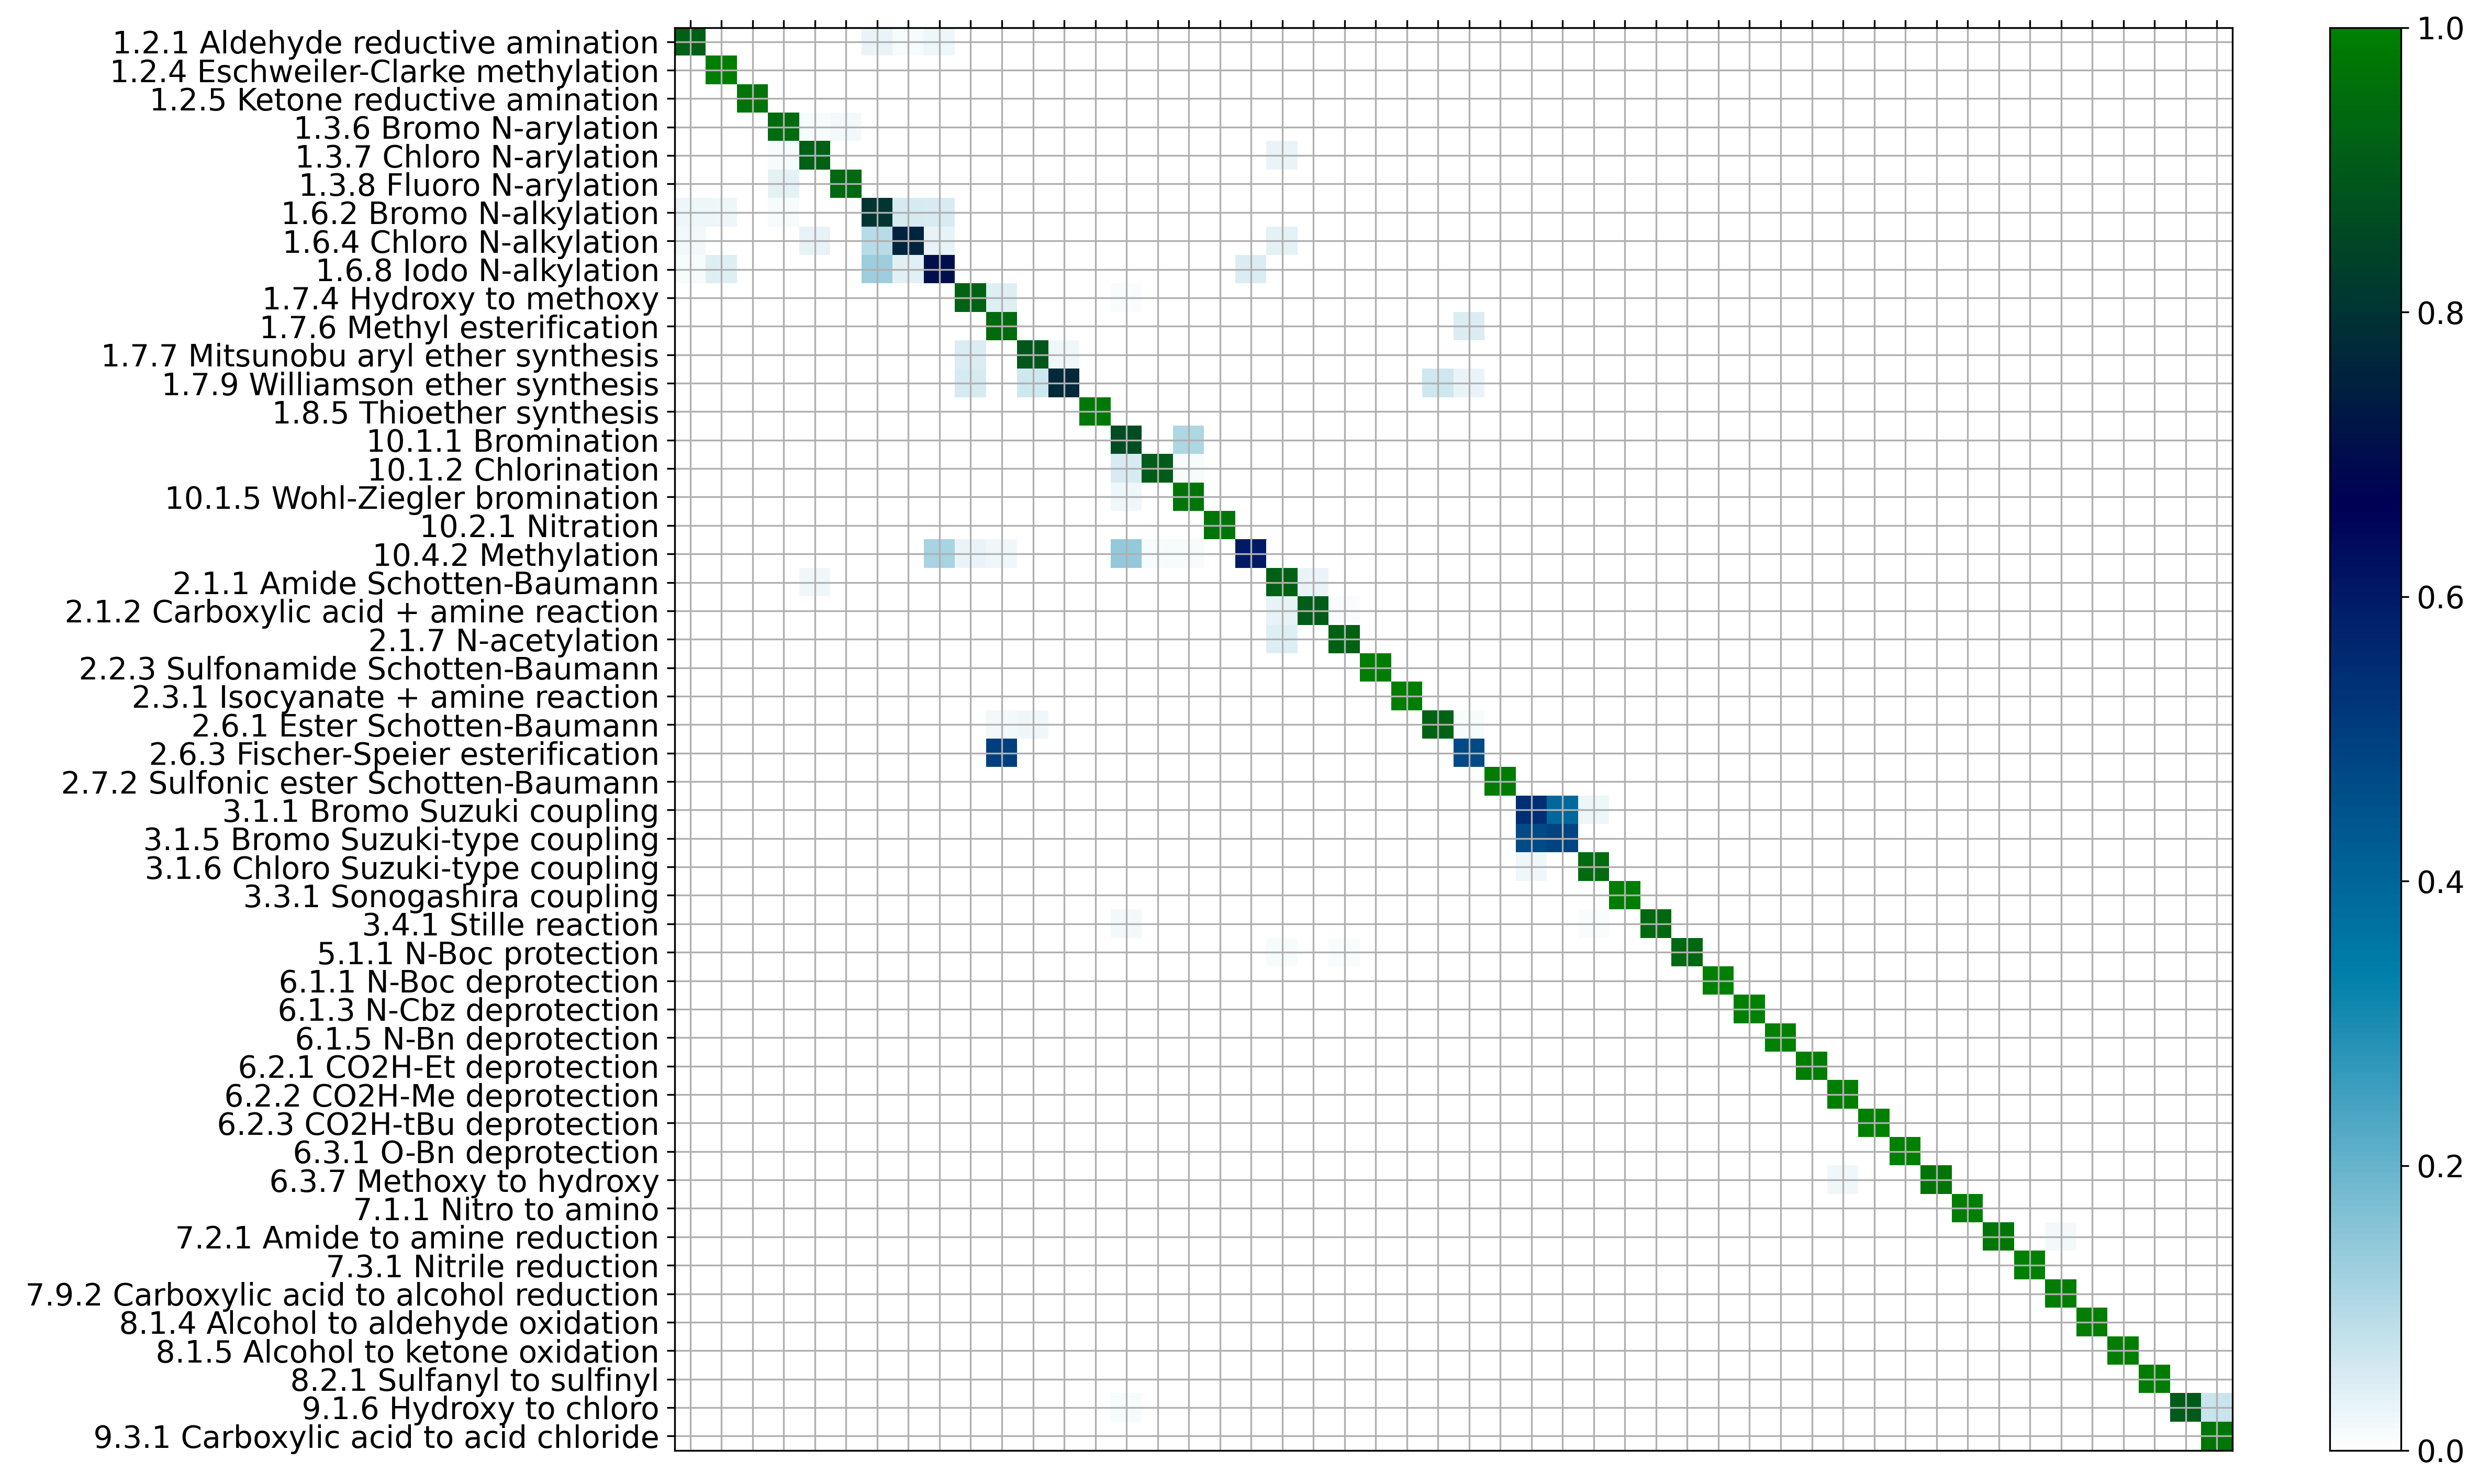

In [10]:
utilsFunctions.labelled_cmat(cmat_fp_AP3,rtypes,figsize=(16,12),labelExtras=names_rTypes, xlabel=False)

In [9]:
cmat_fp_MG2 = utilsFunctions.evaluateModel(result_kNN_fp_MG2, testFps_fp_MG2, testActs, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.8325  0.9610  0.8922     1.2.1 Aldehyde reductive amination
 1  0.6837  0.7141  0.6986     1.2.4 Eschweiler-Clarke methylation
 2  0.8888  0.9916  0.9374     1.2.5 Ketone reductive amination
 3  0.7125  0.7766  0.7432     1.3.6 Bromo N-arylation
 4  0.7462  0.8361  0.7886     1.3.7 Chloro N-arylation
 5  0.7825  0.8552  0.8172     1.3.8 Fluoro N-arylation
 6  0.4700  0.7162  0.5675     1.6.2 Bromo N-alkylation
 7  0.5112  0.7239  0.5993     1.6.4 Chloro N-alkylation
 8  0.5188  0.7815  0.6236     1.6.8 Iodo N-alkylation
 9  0.9187  0.7477  0.8245     1.7.4 Hydroxy to methoxy
10  0.8912  0.1432  0.2467     1.7.6 Methyl esterification
11  0.7425  0.8710  0.8016     1.7.7 Mitsunobu aryl ether synthesis
12  0.6038  0.9699  0.7442     1.7.9 Williamson ether synthesis
13  0.7450  0.9917  0.8508     1.8.5 Thioether synthesis
14  0.5700  0.8941  0.6962    10.1.1 Bromination
15  0.5613  0.9182  0.6967    10.1.2 Chlorination
16  0.9163  0.9361

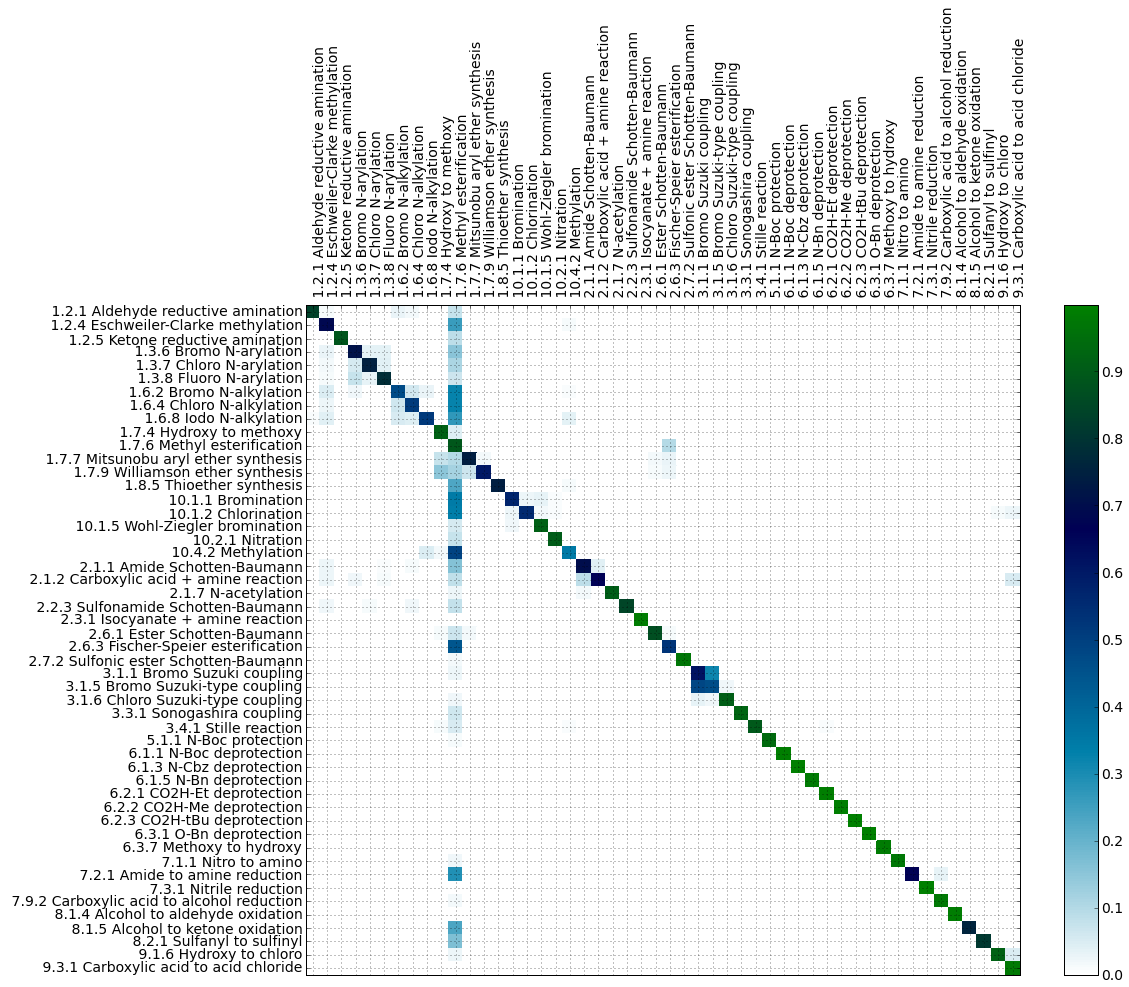

In [16]:
utilsFunctions.labelled_cmat(cmat_fp_MG2,rtypes,figsize=(16,12),labelExtras=names_rTypes)

In [11]:
cmat_fp_TT = utilsFunctions.evaluateModel(result_kNN_fp_TT, testFps_fp_TT, testActs, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.7375  0.8538  0.7914     1.2.1 Aldehyde reductive amination
 1  0.8875  0.6068  0.7208     1.2.4 Eschweiler-Clarke methylation
 2  0.8888  0.9673  0.9264     1.2.5 Ketone reductive amination
 3  0.7125  0.7028  0.7076     1.3.6 Bromo N-arylation
 4  0.7525  0.7728  0.7625     1.3.7 Chloro N-arylation
 5  0.7512  0.8222  0.7851     1.3.8 Fluoro N-arylation
 6  0.4725  0.5087  0.4900     1.6.2 Bromo N-alkylation
 7  0.4200  0.7179  0.5300     1.6.4 Chloro N-alkylation
 8  0.5212  0.5666  0.5430     1.6.8 Iodo N-alkylation
 9  0.8538  0.7182  0.7801     1.7.4 Hydroxy to methoxy
10  0.9788  0.5707  0.7210     1.7.6 Methyl esterification
11  0.7375  0.7516  0.7445     1.7.7 Mitsunobu aryl ether synthesis
12  0.5887  0.8920  0.7093     1.7.9 Williamson ether synthesis
13  0.7925  0.9799  0.8763     1.8.5 Thioether synthesis
14  0.7275  0.7221  0.7248    10.1.1 Bromination
15  0.6613  0.8076  0.7271    10.1.2 Chlorination
16  0.8862  0.9125

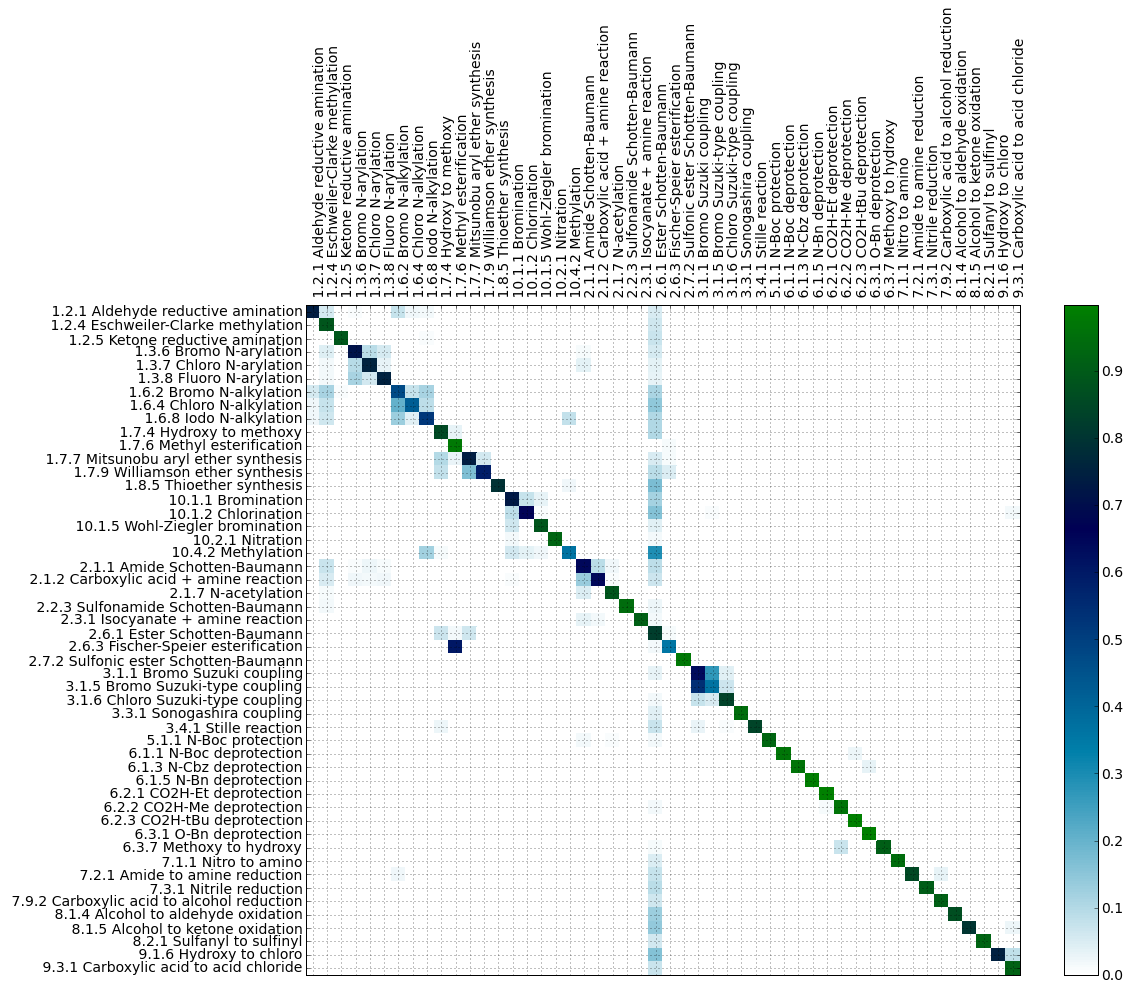

In [17]:
utilsFunctions.labelled_cmat(cmat_fp_TT,rtypes,figsize=(16,12),labelExtras=names_rTypes)

Build the kNN classifiers with k=30

In [18]:
kNN_cls_AP3 = KNeighborsClassifier(n_neighbors=30)
result_kNN_fp_AP3 = kNN_cls_AP3.fit(trainFps_fp_AP3,trainActs)
kNN_cls_MG2 = KNeighborsClassifier(n_neighbors=30)
result_kNN_fp_MG2 = kNN_cls_MG2.fit(trainFps_fp_MG2,trainActs)
kNN_cls_TT = KNeighborsClassifier(n_neighbors=30)
result_kNN_fp_TT = kNN_cls_TT.fit(trainFps_fp_TT,trainActs)

Evaluate the models

In [19]:
cmat_fp_AP3 = utilsFunctions.evaluateModel(result_kNN_fp_AP3, testFps_fp_AP3, testActs, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.8337  0.9896  0.9050     1.2.1 Aldehyde reductive amination
 1  0.9788  0.6773  0.8006     1.2.4 Eschweiler-Clarke methylation
 2  0.9000  0.9931  0.9443     1.2.5 Ketone reductive amination
 3  0.9075  0.9109  0.9092     1.3.6 Bromo N-arylation
 4  0.9263  0.8864  0.9059     1.3.7 Chloro N-arylation
 5  0.8875  0.9621  0.9233     1.3.8 Fluoro N-arylation
 6  0.6663  0.8039  0.7286     1.6.2 Bromo N-alkylation
 7  0.6162  0.8189  0.7033     1.6.4 Chloro N-alkylation
 8  0.6175  0.6309  0.6241     1.6.8 Iodo N-alkylation
 9  0.8662  0.7674  0.8139     1.7.4 Hydroxy to methoxy
10  0.9300  0.5243  0.6706     1.7.6 Methyl esterification
11  0.8263  0.7598  0.7916     1.7.7 Mitsunobu aryl ether synthesis
12  0.4525  0.9258  0.6079     1.7.9 Williamson ether synthesis
13  0.9600  0.9505  0.9552     1.8.5 Thioether synthesis
14  0.8650  0.8793  0.8721    10.1.1 Bromination
15  0.8400  0.9586  0.8954    10.1.2 Chlorination
16  0.9688  0.8554

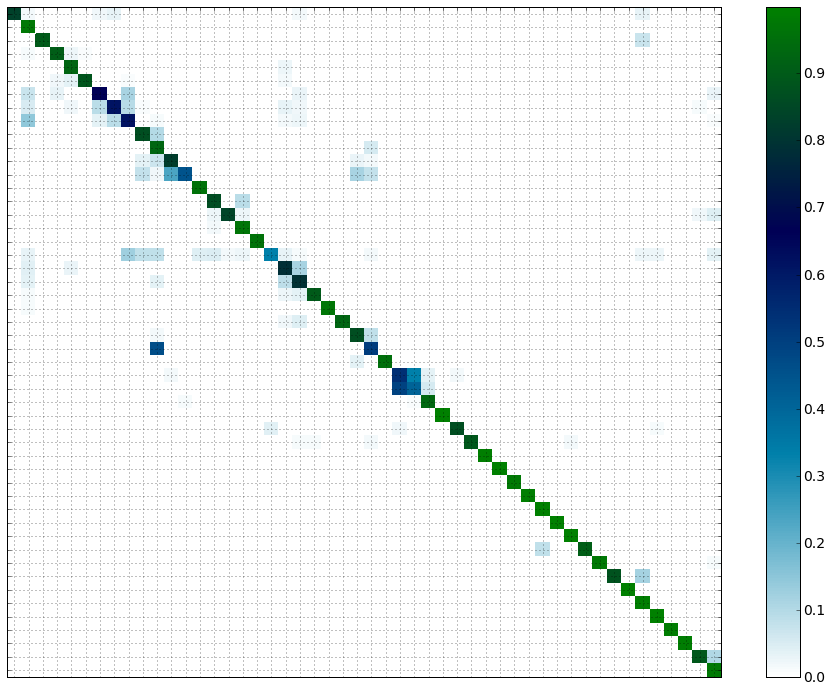

In [20]:
utilsFunctions.labelled_cmat(cmat_fp_AP3,rtypes,figsize=(16,12),labelExtras=names_rTypes, xlabel=False, ylabel=False)

In [21]:
cmat_fp_MG2 = utilsFunctions.evaluateModel(result_kNN_fp_MG2, testFps_fp_MG2, testActs, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.7075  0.8956  0.7905     1.2.1 Aldehyde reductive amination
 1  0.5450  0.6365  0.5872     1.2.4 Eschweiler-Clarke methylation
 2  0.7887  0.9953  0.8801     1.2.5 Ketone reductive amination
 3  0.7037  0.6866  0.6951     1.3.6 Bromo N-arylation
 4  0.6950  0.7898  0.7394     1.3.7 Chloro N-arylation
 5  0.7225  0.7896  0.7546     1.3.8 Fluoro N-arylation
 6  0.4763  0.7937  0.5953     1.6.2 Bromo N-alkylation
 7  0.4437  0.8105  0.5735     1.6.4 Chloro N-alkylation
 8  0.3800  0.7896  0.5131     1.6.8 Iodo N-alkylation
 9  0.9087  0.6094  0.7296     1.7.4 Hydroxy to methoxy
10  0.8875  0.4078  0.5588     1.7.6 Methyl esterification
11  0.5938  0.8467  0.6980     1.7.7 Mitsunobu aryl ether synthesis
12  0.4825  0.9234  0.6338     1.7.9 Williamson ether synthesis
13  0.9213  0.9906  0.9547     1.8.5 Thioether synthesis
14  0.7488  0.8631  0.8019    10.1.1 Bromination
15  0.4487  0.9703  0.6137    10.1.2 Chlorination
16  0.8525  0.8986

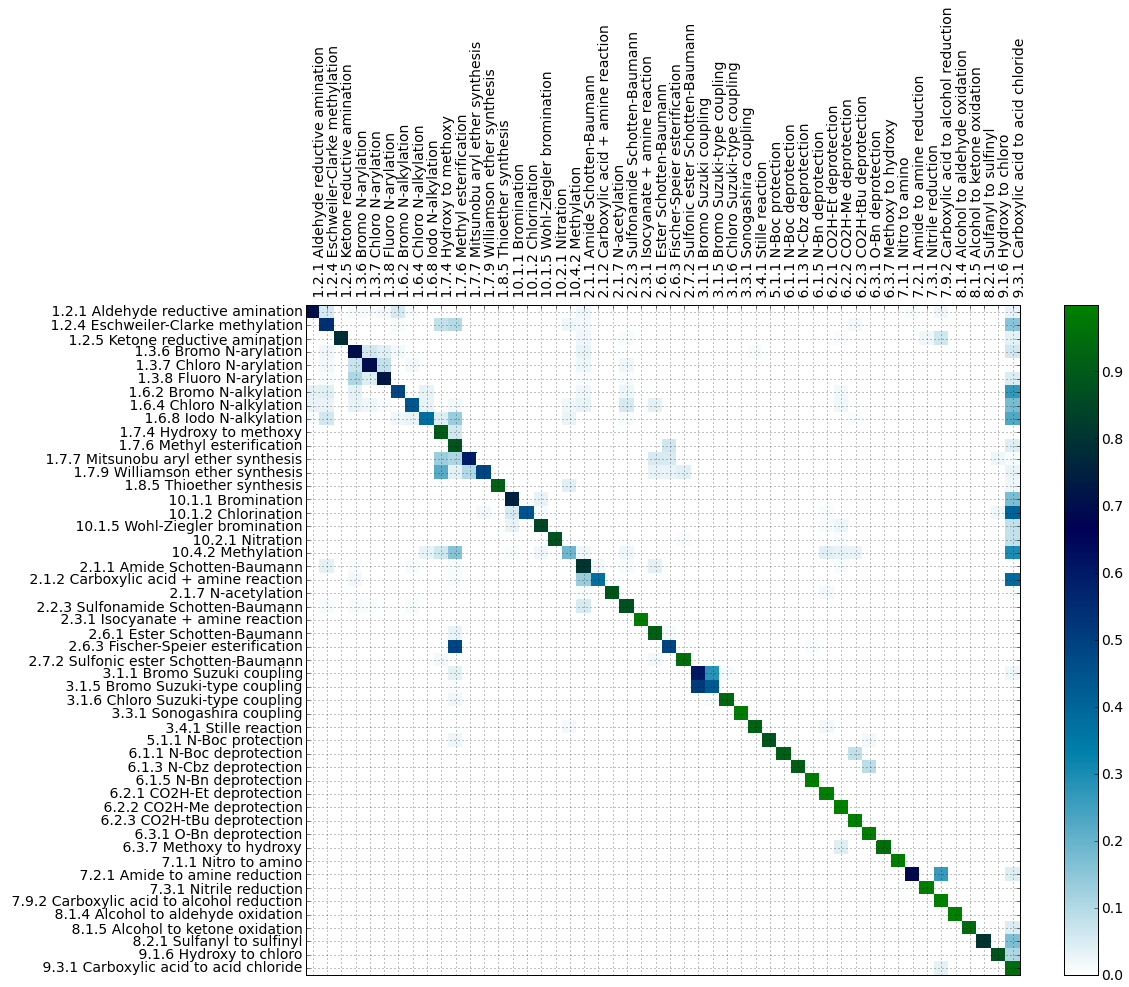

In [22]:
utilsFunctions.labelled_cmat(cmat_fp_MG2,rtypes,figsize=(16,12),labelExtras=names_rTypes)

In [23]:
cmat_fp_TT = utilsFunctions.evaluateModel(result_kNN_fp_TT, testFps_fp_TT, testActs, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.5288  0.8135  0.6409     1.2.1 Aldehyde reductive amination
 1  0.6075  0.4714  0.5309     1.2.4 Eschweiler-Clarke methylation
 2  0.6462  0.9923  0.7827     1.2.5 Ketone reductive amination
 3  0.4100  0.6332  0.4977     1.3.6 Bromo N-arylation
 4  0.6725  0.6667  0.6696     1.3.7 Chloro N-arylation
 5  0.5525  0.7964  0.6524     1.3.8 Fluoro N-arylation
 6  0.2037  0.4417  0.2789     1.6.2 Bromo N-alkylation
 7  0.2625  0.6325  0.3710     1.6.4 Chloro N-alkylation
 8  0.3225  0.5160  0.3969     1.6.8 Iodo N-alkylation
 9  0.4963  0.5358  0.5152     1.7.4 Hydroxy to methoxy
10  0.9613  0.4033  0.5682     1.7.6 Methyl esterification
11  0.6362  0.6501  0.6431     1.7.7 Mitsunobu aryl ether synthesis
12  0.2200  0.8756  0.3516     1.7.9 Williamson ether synthesis
13  0.5012  0.9877  0.6650     1.8.5 Thioether synthesis
14  0.3900  0.7446  0.5119    10.1.1 Bromination
15  0.3162  0.7229  0.4400    10.1.2 Chlorination
16  0.8263  0.9155

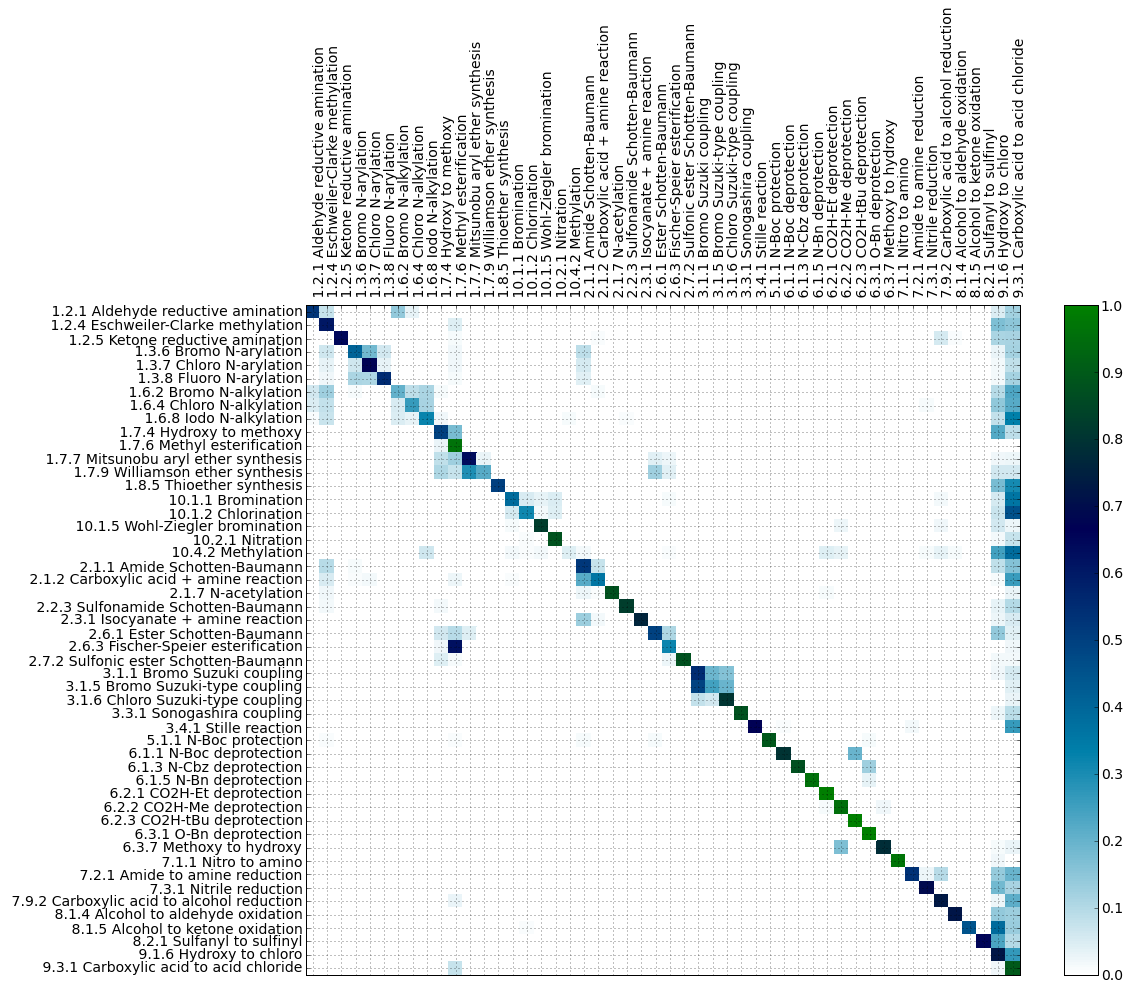

In [24]:
utilsFunctions.labelled_cmat(cmat_fp_TT,rtypes,figsize=(16,12),labelExtras=names_rTypes)